MOUNT THE DRIVE AND LOAD THE DATASET

In [1]:
#save test set predictions to a file
import os
import sys
import PIL.Image as Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/harmonie'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/harmonie


'/content/gdrive/My Drive/Colab Notebooks/harmonie'

#open the file and get a boxplot

In [8]:
df = pd.read_csv("harmonies_data_2.csv",sep=",")
df.columns=["type","score"]
df.head()

,type,score
0,triad,2.94594
1,triad,3.03718
2,triad,2.98151
3,triad,2.79095
4,triad,2.94594


In [9]:
df["type"].value_counts()

triad        104
rectangle    101
mono         101
analog       101
comp         101
Name: type, dtype: int64

In [10]:
#extract each type as a Series; and concatenate them
concatdf = pd.DataFrame()
for tpe in ["mono","analog","rectangle","comp","triad"]:
  typeSeries = df.loc[df["type"]==tpe]
  concatdf[tpe]=list(typeSeries["score"][:100])


In [11]:
concatdf.head(20)

,mono,analog,rectangle,comp,triad
0,3.15404,3.06124,2.89149,2.96409,2.94594
1,2.99496,3.06797,2.98948,2.99854,3.03718
2,3.01797,2.98786,2.86220,3.00943,2.98151
3,3.09469,3.05155,3.01305,3.05612,2.79095
4,3.00475,3.05155,3.13640,3.05612,2.94594
5,3.06268,2.91799,3.03588,3.01888,3.03718
6,3.12764,3.04423,3.00245,3.01654,2.98151
7,3.06981,3.00132,2.92194,2.98005,3.01254
8,3.02774,3.03564,3.13640,2.91545,2.99410
9,2.99760,2.96605,3.04531,2.90359,3.04878


TypeError: ignored

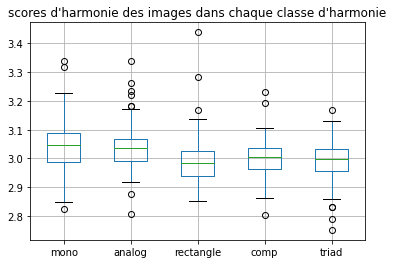

In [12]:
plt.figure()
plt.title("scores d'harmonie des images dans chaque classe d'harmonie")
plt.boxplot(concatdf.boxplot())